<a href="https://colab.research.google.com/github/AleksandrSosnin/Big-Data/blob/main/Home_Work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

Среднее значение 'price': 152.7206871868289
Дисперсия 'price': 57672.8456984336


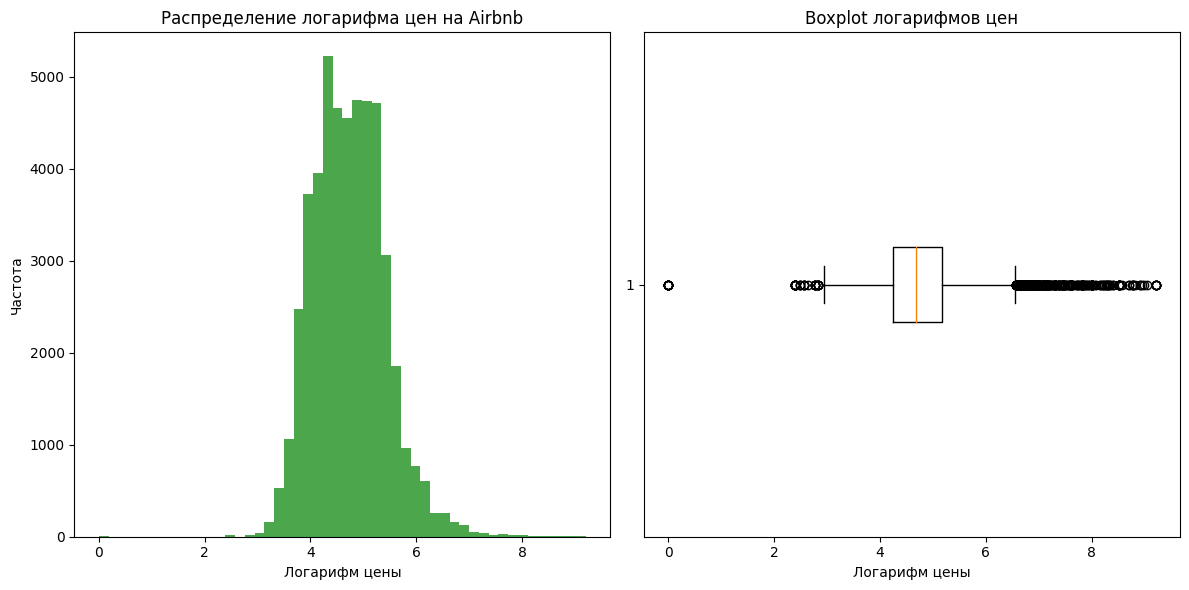

In [7]:
# Логарифмическое преобразование для признака 'price'
df['log_price'] = np.log1p(df['price'])  # Используем log1p для корректной обработки нулевых значений

# Определение функции маппера
def mapper(row):
    price = row['price']
    return (1, price, price**2)

# Определение функции редьюсера
def reducer(a, b):
    n1, sum1, sum_sq1 = a
    n2, sum2, sum_sq2 = b
    return (n1 + n2, sum1 + sum2, sum_sq1 + sum_sq2)

# Применение MapReduce
mapped_values = map(mapper, df.to_dict('records'))
n, sum_price, sum_sq_price = reduce(reducer, mapped_values)

# Расчет среднего и дисперсии
mean_price = sum_price / n
variance_price = (sum_sq_price / n) - (mean_price ** 2)

# Печать результатов
print(f"Среднее значение 'price': {mean_price}")
print(f"Дисперсия 'price': {variance_price}")

# Визуализация
plt.figure(figsize=(12, 6))

# Гистограмма логарифмически преобразованных цен
plt.subplot(1, 2, 1)
plt.hist(df['log_price'], bins=50, color='green', alpha=0.7)
plt.title('Распределение логарифма цен на Airbnb')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')

# График Boxplot для логарифмов цен
plt.subplot(1, 2, 2)
plt.boxplot(df['log_price'], vert=False)
plt.title('Boxplot логарифмов цен')
plt.xlabel('Логарифм цены')

# Отображение
plt.tight_layout()
plt.show()

In [ ]:
# SELECT AVG(price), VARIANCE(price)
# FROM airbnb_listings;